<a href="https://colab.research.google.com/github/uellington-bonaparte/dotfiles/blob/master/TrabalhoFinal_Uellington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final - Ciência de Dados - Enap / 2021
* ALUNO: UELLINGTON BONAPARTE ROQUES CÔRTES - ÓRGÃO: POLÍCIA FEDERAL

### Objetivo do estudo

O objetivo inicial deste projeto é analisar o perfil das apreensões realizadas pela Polícia Federal, comparando-as em quantidade e tipo de material entre as Unidades Federativas e sua evolução no tempo.

As hipóteses são que 1) as maiores quantidades de apreensões são realizadas em estados mais desenvolvidos, como São Paulo e Rio de Janeiro e; 2) As maiores quantidades de apreensão de Entorpecentes ocorre nos estados de fronteira.

Devido a apresentação dos dados, não é possível definir o local exato da apreensão, restringindo a análise dos dados aos estados.

Também serão analisados os tipos de materiais apreendidos e sua evolução ao longo dos anos.

Tal estudo poderá possibilitar melhor entendimento das atividades do órgão, bem como melhoria na alocação de recursos.

Futuramente, é desejável realização de outras análises, por exemplo a correspondência entre o valor dos bens apreendidos com o desenvolvimento do estado, subsidiando decisões em relação ao perdimento em nome do órgão e providências para sua alienação, reduzindo o custo de manter esses materiais em depósito e revertendo os recursos para outras prioridades do órgão e políticas públicas diversas.

### Apresentação do Dataset

O nome do dataset deste projeto é "**apreensoes_pf.csv**" e contém dados de materiais apreendidos pela Polícia Federal ao longo dos anos de 2013 a 2021 e contém pouco mais de 1.000.000 de registros.

As informações foram obtidas a partir de consulta analítica de apreensões, gerado no portal https://bi.pf.gov.br (acesso restrito a servidores), interligado ao sistema de polícia judiciária (ePol).

#### Link público do Google Drive para Download do Dataset

https://drive.google.com/file/d/1tU-D5z3h70NcIThdN2bej8xoTYyYKmWw/view?usp=sharing

In [ ]:
# importa módulos e bibliotecas utilizados no projeto
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# instala o módulo folium - link rápido sobre como usar (https://www.youtube.com/watch?v=EElW-W0GmrA)
# !pip install earthengine-api
# !pip install folium

import folium

### Motivação Pessoal

Exerço o cargo de Escrivão da Polícia Federal, sendo lotado atualmente no Núcleo de Tecnologia da Informação e eventualmente apóio a Corregedoria extraindo e analisando dados de Polícia Judiciária. 

Devido às atribuições do meu cargo tenho familiaridade com os dados de inquéritos e apreensões, facilitando a análise das informações obtidas.

O objetivo por ora é maior conhecimento do perfil de atuação do órgão em que trabalho.

### Carregando os dados

In [ ]:
# Carrega o arquivo de apreensões (fonte: bi.pf.gov.br > Estatísticas > Apreensões-Analítico)
# Arquivo convertido para formato .csv (sem alteração/manipulação) pois não estava abrindo no formato .xlsx

# path_apreensoes = '/content/sample_data/apreensoes_pf.csv'  # Google Colab
path_apreensoes = 'D:/Google Drive/Colab Notebooks/apreensoes_pf.csv'

# carrega a tabela apenas com as colunas UF Apreensão, Data Apreensão, Tipo Material e Proc. Área de Atribuição
apreensoes = pd.read_csv(path_apreensoes, sep=';', na_values=['-','*','*-'], encoding='latin1', usecols=[5, 10, 11, 38], header=0)
apreensoes.rename(columns = {'UF Apreensão':'UF', 'Data Apreensão':'Data','Tipo Material':'Material','Proc. Área de Atribuição':'Área'}, inplace = True)

#Acrescenta a coluna ano calculada a partir da extração do campo 'Data Apreensao' (renomeada para Data)
apreensoes['Ano'] = apreensoes['Data'].apply(lambda x: x.split('/')[-1]).astype(int)

#Reorganiza as colunas, eliminando a coluna 'Apreensao' (utilizada somente para identificar o ano)
apreensoes = apreensoes[['UF', 'Material','Ano','Área']]

In [ ]:
# Amostra dos dados coletados (10 primeiras linhas)
# apreensoes.info()
apreensoes.head(10)

,UF,Material,Ano,Área
0,SP,Produtos do tabaco e instrumentos,2912,DFAZ
1,SP,Cédulas e moedas falsas,2099,DFAZ
2,SP,Ordem política e social,2028,DFAZ
3,AL,Entorpecentes,2021,DIREN
4,AL,Materiais esportivos,2021,DIREN
5,SP,Entorpecentes,2021,DIREN
6,TO,Aparelhos de som,2021,DFAZ
7,TO,Produtos de informática,2021,DFAZ
8,PR,Aparelhos eletrônicos,2021,DFAZ
9,PR,Aparelhos eletrônicos,2021,DFAZ


### Problemas encontrados ao trabalhar os dados

Durante a carga dos dados foram detectadas diversas inconsistências na base da dados, sendo a primeira dificuldade a leitura do arquivo no formato original (.xlsx), que mesmo com ajuda de mais de um professor não obtivemos sucesso em acessar o arquivo no formato fornecido. **Solução: Conversão do arquivo para o formato .csv.**

Além disso, por algum erro do Google Colab, a carga dos dados ficavam limitadas a cerca de 7500 registros, impossibilitando a análise naquele ambiente. **Solução aplicada: Migração para o Jupyter, em que a carga foi completamente realizada.**

Também foram encontrados valores nulos para cerca de 10-20% em algum campo dos registros. **Solução: Como a amostra utilizada possuía grande massa de dados, os registros nulos foram simplesmente ignorados, porém sem prejuízos visto que o objeto do estudo utilizou a contagem como meio de obtenção dos quantitativos.**

Os anos utilizados para como medida de tempo desta análise, foi obtida extraindo-se da data da Apreensão, encontrando inconsistências em relação ao ano da apreensão (nulos ou futuros), que não refletiam a realidade. **Solução aplicada: Os registros nulos foram ignorados e os anos maiores que 2021 foram excluídos da base de dados.**

In [ ]:
#Tabela de anos listados antes do tratamento dos dados:
lista_anos = apreensoes.groupby('Ano').agg({'Ano':'count'})
lista_anos

,Ano
Ano,
2013,15375
2014,103291
2015,148046
2016,153263
2017,156206
2018,153902
2019,154103
2020,147340
2021,17036


In [ ]:
# Tratamento e exclusão de anos listados antes do tratamento dos dados:
apreensoes = apreensoes[apreensoes['Ano'] <= 2021].reset_index()
lista_anos = apreensoes.groupby('Ano').agg({'Ano':'count'})
lista_anos

,Ano
Ano,
2013,15375
2014,103291
2015,148046
2016,153263
2017,156206
2018,153902
2019,154103
2020,147340
2021,17036


### Investigação

As análises buscaram identificar as unidades da Polícia Federal com maior número absoluto de apreensões, o tipo de material mais apreendido e sua distribuição no universo dos dados estudados. Também avaliamos a evolução dos quantitativos no tempo.

Os resultados serão demonstrados abaixo, com apresentação de gráficos e considerações pertinentes.

#### Distribuição das apreensões por Unidade Federativa

Os gráficos abaixo exemplificam a distribuição do número de apreensões em relação à cada unidade da Polícia Federal.

In [ ]:
# Agrupa tabela para mostrar todas as ocorrências de Materiais por UF
total_uf = apreensoes.groupby(['UF']).agg({'Material':'count'})
total_uf = total_uf.set_axis(['Apreensões'],axis=1).reset_index()
total_uf

,UF,Apreensões
0,AC,16069
1,AL,8975
2,AM,27339
3,AP,12465
4,BA,31815
5,CE,31740
6,DF,41857
7,ES,20176
8,GO,35002
9,MA,11370


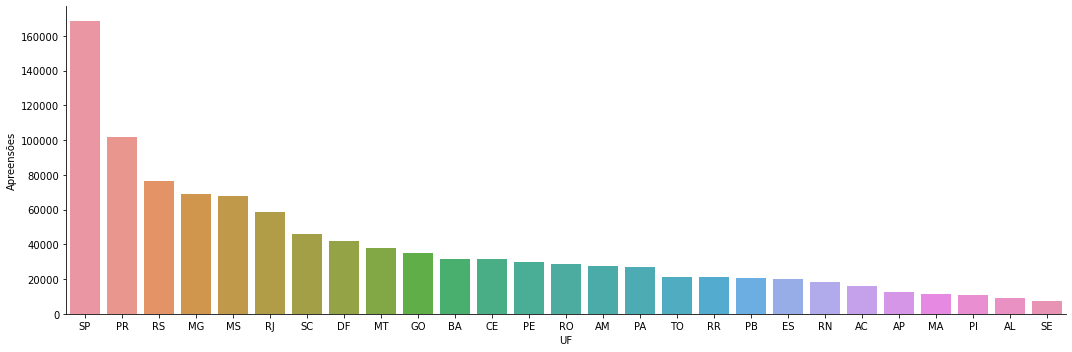

In [ ]:
total_uf.sort_values(by='Apreensões', inplace = True, ascending=False)
# total_uf.set_axis(['Apreensões'],axis=1, inplace=True)
sns.catplot(kind='bar', x = "UF", y='Apreensões', data=total_uf, aspect = 3)

A partir do gráfico acima, podemos observar que os estados com maior volume de apreensões são:
**SÃO PAULO, PARANÁ, RIO GRANDE DO SUL, MINAS GERAIS E MATO GROSSO DO SUL E RIO DE JANEIRO**, sendo São Paulo e Paraná os grandes outliers do número máximo de apreensões, mostrando-se com distribuições discrepantes em relação aos demais estados.

Em relação aos estados com menor número de apreensão estão **ALAGOAS e SERGIPE**.


A fim de melhor visualizar essa distribuição, apresentamos o mapa abaixo, onde a participação de cada estado é representada pelo tamanho do seu marcador. Para visualizar as quantidades e seu percentual clique com o mouse no marcador desejado.

In [ ]:
# CONFIGURA MAPA COM AS DISTRIBUIÇÕES DE APREENSÕES
# cria o mapa e define visualização inicial no Brasil
mapa = folium.Map(location=[-15, -60], width=800, tiles='cartodb positron', zoom_start = 4, min_zoom=4, max_zoom = 4)

In [ ]:
# Dicionario de Coordenadas das Capitais
capitais = { 'AC': [ -8.77, -70.55], 'AL': [ -9.71, -35.73], 'AM': [ -3.07, -61.66], 'AP': [  1.41, -51.77], 'BA': [-12.96, -38.51],
             'CE': [ -3.71, -38.54], 'DF': [-15.83, -47.86], 'ES': [-19.19, -40.34], 'GO': [-16.64, -49.31], 'MA': [ -2.55, -44.30],
             'MT': [-12.64, -55.42], 'MS': [-20.51, -54.54], 'MG': [-18.10, -44.38], 'PA': [ -5.53, -52.29], 'PB': [ -7.06, -35.55],
             'PR': [-24.89, -51.55], 'PE': [ -8.28, -35.07], 'PI': [ -8.28, -43.68], 'RJ': [-22.84, -43.15], 'RN': [ -5.22, -36.52],
             'RO': [-11.22, -62.80], 'RS': [-30.01, -51.22], 'RR': [  1.89, -61.22], 'SC': [-27.33, -49.44], 'SE': [-10.90, -37.07],
             'SP': [-23.55, -46.64], 'TO': [-10.25, -48.25] }

In [ ]:
# Cria um marcador no mapa para cada UF
# O tamanho (radius) do marcador é obtido dividindo o total de apreensoes de cada capital pelo total, definindo o percentual 
# da participaçao de cada estado em relação ao total.Ao final multiplicamos esse valor por 1.1 para melhor visualização no mapa.

# Calcula o total de apreensões
total_apreensoes = total_uf['Apreensões'].sum()
#total_apreensoes

# define o título do mapa
titulo  =  '<h3 align = "center" style = "font-size: 20px"> <b> Concentração de Apreensões por Unidade Federativa </b> </h3>' 
mapa.get_root().html.add_child(folium.Element(titulo))

# intera a lista de capitais atribuindo as coordenadas ao marcador
for c in capitais:
    total_c = total_uf['Apreensões'][total_uf['UF'] == c].values[0]
    perc_c = total_c/total_apreensoes *100
    tooltip_text = f"{c}: {total_c} apreensões ({round(perc_c,1)}%)"

    folium.CircleMarker(
     capitais[c],
     popup = tooltip_text,
     tooltip= tooltip_text,
     fill = True,
     fill_color = '#3186cc',
     fill_opacity = 0.8,
     radius = perc_c * 1.1
 ).add_to(mapa)

In [ ]:
# Exibe o mapa
mapa

### Distribuição das apreensões por Tipo de Material

Em relação ao tipo de material apreendido, verificamos a existência de diversas categorias, que vão desde animais silvestres e cigarros a entorpecentes, aeronaves, etc, conforme lista a seguir:

In [ ]:
# Lista os tipos de materiais apreendidos
print(pd.DataFrame(apreensoes['Material'].unique()))

                              0
0                 Entorpecentes
1          Materiais esportivos
2              Aparelhos de som
3       Produtos de informática
4         Aparelhos eletrônicos
..                          ...
86           Carteira funcional
87                       Enxada
88             Fonte de energia
89        Espingarda calibre 36
90  Extintor de pó pressurizado

[91 rows x 1 columns]


O gráfico abaixo ilustra os 10 materiais com maior número apreensões.

Destaca-se além do volume de documentos, grande ocorrência de materiais eletrônicos, equipamentos de informática, entorpecentes e veículos.

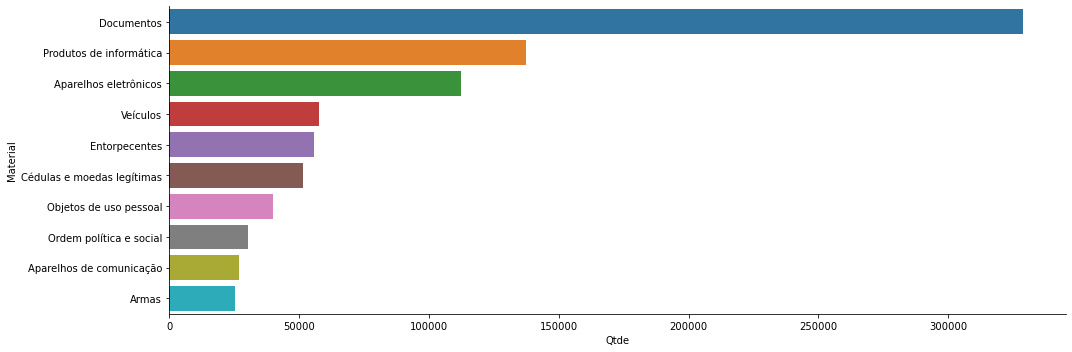

In [ ]:
# Exibe 10 tipos de materiais mais apreendidos
top10_material = apreensoes.groupby(['Material']).agg({'Material':'count'})
top10_material = top10_material.set_axis(['Qtde'],axis=1).reset_index().sort_values(by='Qtde', ascending=False).head(10)
g = sns.catplot(kind='bar', y = 'Material', x='Qtde', data=top10_material, aspect = 3, orient='h')

Dando continuidade ao estudo, verificamos a distribuição dos principais tipos materiais e sua ocorrência por estado, mostrando o resultado no gráfico de pontos abaixo, onde o tamanho do ponto representa a proporção do número de apreensões. (Quanto maior o tamanho do ponto, mais apreensões naquele local)

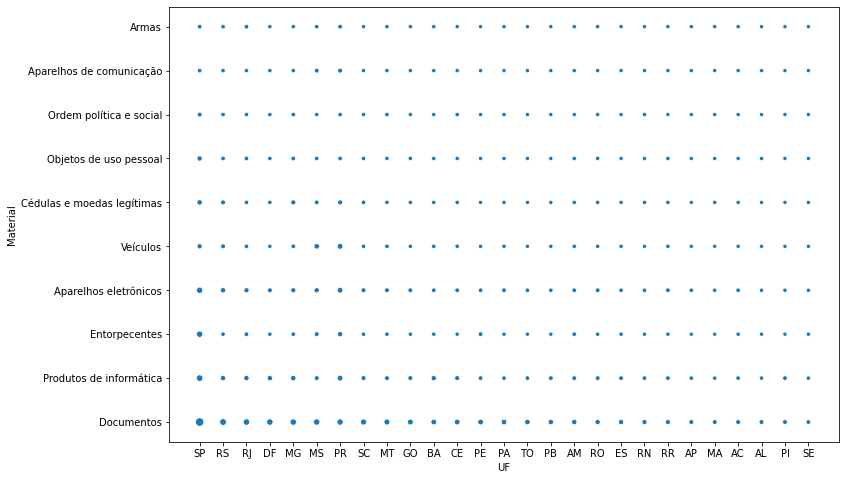

In [ ]:
# Gráfico de distribuição por tipo de material por estado
aprensoes_uf_material = apreensoes.groupby(['UF','Material']).agg({'Material':'count'})
aprensoes_uf_material = aprensoes_uf_material.set_axis(['Qtde'],axis=1).reset_index().sort_values(by='Qtde', ascending=False).reset_index() # converte em indice em coluna
aprensoes_uf_material.sort_values(by='UF')  ## ORGANIZAR POR ESTADO
top10 = aprensoes_uf_material[aprensoes_uf_material.Material.isin(top10_material.Material)]
fig,ax1 = plt.subplots(figsize=(12,8))
sns.scatterplot(ax=ax1, y='Material',x='UF', data=top10, size='Qtde',legend=False)

### Quanto à evolução do número de apreensões pelos anos

Buscou-se com esta etapa do estudo avaliar a variação do número de apreensões no decorrer do ano.

Considerando que a série de dados referentes ao ano de 2021 está incompleta, devido a coleta ter ocorrido no início do mês de fevereiro, optamos pela sua exclusão deste comparativo.

Como se pode observar no gráfico de linhas abaixo, houve um aumento significativo no número de apreensões nos anos de 2013 e 2014, mantendo-se em um nível estável a partir do ano de 2015 até 2020.

Sugere-se análise em relação aos motivos do incremento das apreensões nos anos de 2013 e 2014, devendo-se investigar eventual mudança de procedimentos, alteração da legislação, ampliação do efetivo, implantação de sistemas informatizados, etc.

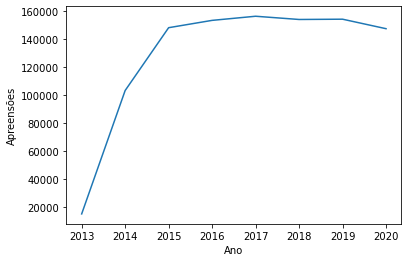

In [ ]:
# Exclui ano 2021 para exibiçao no grafico:
#apreensoes_ate21 = apreensoes[apreensoes['Ano'] < 2021].reset_index()
anos_ate21 = apreensoes[apreensoes['Ano'] < 2021].groupby('Ano').agg({'Ano':'count'})

anos_ate21.set_axis(['Apreensões'],axis=1, inplace=True)
sns.lineplot(x=anos_ate21.index, y='Apreensões', data=anos_ate21)

Considerando as atribuições da Polícia Federal e sua forte atuação nos crimes de tráfico de Drogas, apresentamos abaixo a evolução das apreensões de Armas, Entorpecentes e Veículos ao longo dos anos analisados.

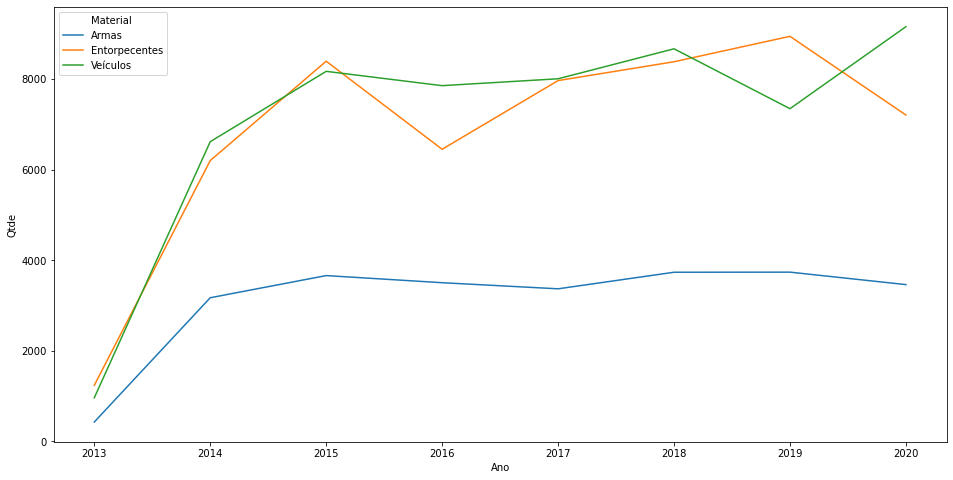

In [ ]:
mat_sel = ['Armas','Entorpecentes','Veículos']
mat_ano = apreensoes[apreensoes['Ano'] < 2021].groupby(['Ano','Material']).agg({'Material':'count'})
mat_ano = mat_ano.set_axis(['Qtde'],axis=1).reset_index()

top10_mat_ano = mat_ano[mat_ano.Material.isin(mat_sel)]
fig,ax1 = plt.subplots(figsize=(16,8))
sns.lineplot(y='Qtde',x='Ano', hue='Material', data=top10_mat_ano)

### Conclusões e Achados


#### Quanto à quantidade de apreensões
*   **SÃO PAULO é o estado com maior número de apreensões** absolutas.
*   PARANÁ e RIO GRANDE DO SUL estão em 2º e 3º lugares, respectivamente, no ranking de apreensões.
*   MINAS GERAIS e RIO DE JANEIRO, aparecem como 4º e 6º lugares dessa classificação.


#### Quanto ao tipo de material apreendido
*   Verificou-se grande quantidade de documentos, equipamentos eletrônicos, e de informática, entorpecentes, cédulas falsas, veículos e dinheiro.
*   **Os estados que mais apreendem entorpecentes, são os Estados de SÃO PAULO E PARANÁ**. Salienta-se que tal estudo avaliou apenas as quantidades de apreensões, não podendo determinar se estes estados estariam na mesma posição em relação ao total apreendido.
*   Devido à baixa granularidade dos dados estudados, não é possível determinar os tipos de crime e suas proporções em relação a estas apreensões, sendo certo que estão diluidas entre diversas tipificações penais. Sugere-se uma análise utilizando-se dados por tipo penal a fim de identificar por exemplo qual delegacia especializada da Polícia Federal apreende mais veículos e dinheiro. (Ex. Quantas apreensões de veículos foram realizadas pelas delegacias de Combate ao Tráfico de Drogas, e quantos pela delegacias de Crimes Fazendários ou Contra o Patrimônio?)
*   A presente análise pode ser aprofundada, utilizando-se os dados socio-econômicos do IBGE e de ocorrências criminais do Ministério da Justiça a fim de identificar eventuais correlações entre a taxa de criminalidade e outros indicadores. 

#### Quanto à evolução das apreensões no tempo
*   Verificou-se acrescimento da quantidade de apreensões nos anos de 2013 e 2014, cujos motivos devem ser investigados mais detidamente a fim de identificar eventual mudança de procedimentos, alteração da legislação, ampliação do efetivo, implantação de sistemas informatizados, etc.
*   Após esse período constata-se certa estabilidade na quantidade de apreensões.
*   Entre os anos de 2019 e 2020 houve redução do número de apreensões de entorpecentes, e aumento de apreensões de veículos.
*   As apreensões de armas manteve-se constante de 2014 a 2020.
*   O gráfico de apreensões de entorpecentes, veículos e armas apresenta curva compatível à evolução geral das apreensões. 